In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(0)

## Make Dataset

In [2]:
numberOfData = 100
# Dataset Positive
datasetPositive_X = np.random.randn(2,numberOfData) * 50
datasetPositive_Y = np.ones((1, datasetPositive_X.shape[1]))

# Dataset Negative 
numberOfData = 100
radius = np.random.randn(1, numberOfData) * 40 + 600
theta = np.random.uniform(0, 360,(1, numberOfData))
x = radius*np.cos(theta)
y = radius*np.sin(theta)
datasetNegative_X = np.array([x[0], y[0]])
datasetNegative_Y = np.zeros((1, datasetNegative_X.shape[1]))

In [3]:
datasetAll_X = np.concatenate((datasetPositive_X, datasetNegative_X), axis=1)
print ("Shape Dataset Input(X):", datasetAll_X.shape)

datasetAll_Y = np.concatenate((datasetPositive_Y, datasetNegative_Y), axis=1)
print ("Shape Dataset Label(Y):", datasetAll_Y.shape)
print ('I have m = %d training examples!' % (datasetAll_Y.shape[1]))

Shape Dataset Input(X): (2, 200)
Shape Dataset Label(Y): (1, 200)
I have m = 200 training examples!


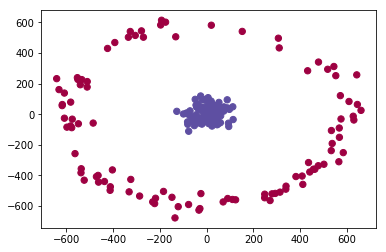

In [4]:
# Visualize the data:
plt.scatter(datasetAll_X[0, :], datasetAll_X[1, :], c=datasetAll_Y.flatten(), s=40, cmap=plt.cm.Spectral);

In [5]:
datasetAll_X[0].shape

(200,)

## NN Module

In [6]:
import torch
import torch.nn as nn

dtype = torch.float
device = torch.device("cpu")

epoch_total = 1000
learning_rate = 1e-2

input_x = torch.tensor([datasetAll_X[0], datasetAll_X[1]], dtype=dtype, device=device)
target = torch.tensor(datasetAll_Y, dtype=dtype, device=device)

class Model_NN(nn.Module):
    def __init__(self):
        super(Model_NN, self).__init__()
        # -- Layer #1 --
        D_H = 3
        self.linear1 = nn.Linear(2, D_H)
        self.relu1 = nn.ReLU()
        
        # -- Layer #2 --
        self.linear2 = nn.Linear(D_H, 1)
        self.sigmoid2 = nn.Sigmoid()

    def forward(self, x):
        # -- Layer #1 --
        x = self.linear1(x)
        x = self.relu1(x)
        
        # -- Layer #2 --
        x = self.linear2(x)
        y_pred = self.sigmoid2(x)
        return y_pred

model = Model_NN()
print(model)

params = list(model.parameters())

print(len(params))
print(params)

loss_fn = torch.nn.BCELoss()

for epoch in range(epoch_total):
    output = model(input_x.t())
    target = target.view(1, -1)  # make it the same shape as output
    loss = loss_fn(output, target)
    if epoch%100 == 0:
        print(f'Loss in iteration {epoch}: {loss}')
    
    # Use autograd to compute backward pass.
    model.zero_grad()

    loss.backward()

    # We don't want to track weight update in autograd
    with torch.no_grad():
        # Update weights
        for param in model.parameters():
            param -= learning_rate * param.grad

Model_NN(
  (linear1): Linear(in_features=2, out_features=3, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid2): Sigmoid()
)
4
[Parameter containing:
tensor([[ 0.3346, -0.3148],
        [-0.1249, -0.1456],
        [-0.5304, -0.1302]]), Parameter containing:
tensor([ 0.2696,  0.6513, -0.5464]), Parameter containing:
tensor([[-0.3644, -0.3134, -0.1899]]), Parameter containing:
tensor(1.00000e-02 *
       [-6.4791])]
Loss in iteration 0: 3.343600273132324
Loss in iteration 100: 0.4279874563217163
Loss in iteration 200: 0.36279165744781494
Loss in iteration 300: 0.3198893070220947
Loss in iteration 400: 0.2851078510284424
Loss in iteration 500: 0.2560877501964569
Loss in iteration 600: 0.23162072896957397
Loss in iteration 700: 0.2108215093612671
Loss in iteration 800: 0.19301101565361023


/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([1, 200])) that is different to the input size (torch.Size([200, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Loss in iteration 900: 0.17765912413597107


(2, 200)


Text(0.5,1,'Decision Boundary for hidden layer size 4')

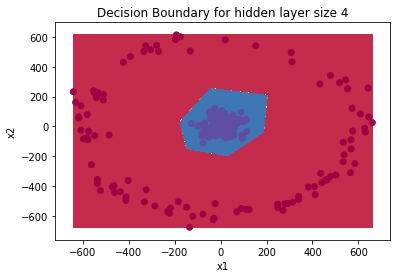

In [7]:
# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0,                                                                              :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    with torch.no_grad():
        Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=dtype, device=device))
    Z = Z.reshape(xx.shape)
    
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z.data.numpy() , cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    
plot_decision_boundary(model, datasetAll_X, datasetAll_Y.flatten())
print(datasetAll_X.shape)
plt.title("Decision Boundary for hidden layer size " + str(4))